In [1]:
import mpy
import mpy.specMagneticField as specMagneticField
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bField = specMagneticField.SPECField(
    mpy.SPECOut("test.sp.h5"),
    lvol = 0, 
    sResolution = 32,
    thetaResolution = 32,
    zetaResolution = 32
)

In [3]:
# islandAxis = specMagneticField.findAxis(bField, sInit=0, thetaInit=0, jacobianData="jacobianData_128.h5", debug=False)

In [32]:
line = specMagneticField.FieldLine.readH5("line7.h5")

face = specMagneticField.SPECSurface(bField=bField, line=line, mpol=12, ntor=12, verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5148e+02                                    1.57e+03    
       1              2         1.9252e+02      1.59e+02       1.00e+00       2.73e-04    
       2              3         1.9252e+02      4.80e-12       2.00e+00       1.58e-07    
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 3.5148e+02, final cost 1.9252e+02, first-order optimality 1.58e-07.
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.2190e+03                                    1.16e+04    
       1              2         4.2069e+02      7.80e+03       1.00e+00       2.41e+03    
       2              3         1.9064e+00      4.19e+02       6.01e-01       5.87e-07    
       3              4         1.9064e+00      1.11e-15       4.91e-08       5.61e-08    
`ftol` termination condition is s

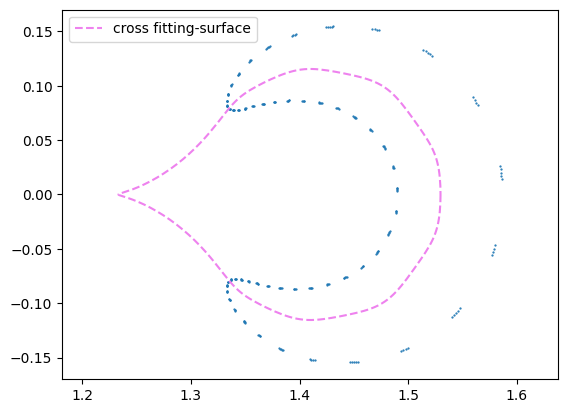

In [33]:
nums = 200
thetaArr = np.linspace(0, 2*np.pi, nums)
zetaArr = np.zeros(nums)
rArr = face.getValue(thetaArr, zetaArr, value='r').flatten()
zArr = face.getValue(thetaArr, zetaArr, value='z').flatten()
fig, ax = plt.subplots()
specMagneticField.plotPoincare([line], ax=ax)
ax.plot(rArr, zArr, color="violet", ls="--", label="cross fitting-surface")
plt.axis("equal")
plt.legend()
